## Gestion type programme
A l'aide d'une ACP, nous justifions le regroupement de nos `types de programmes` en 8 classes.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

[2.06382138e-01 1.90793377e-01 1.45931619e-01 8.95969116e-02
 5.84065942e-02 4.59019643e-02 3.14341418e-02 2.63728413e-02
 1.57783762e-02 1.21926762e-02 1.06649390e-02 9.29331341e-03
 2.59646356e-03 1.92071556e-03 1.51723925e-03 9.89030178e-04
 7.11415399e-04 6.18461928e-04 5.50559324e-04 4.05720860e-04
 2.14731890e-04 1.07336774e-04 4.29414103e-05 2.13978747e-05
 2.27248733e-30]


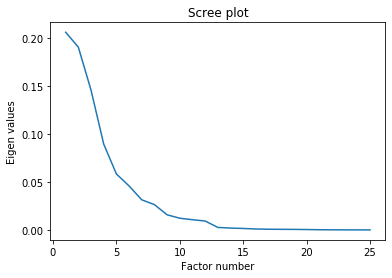

In [23]:
data = pd.read_csv("Base_donnees.csv", sep=",")
type1_ohe = ohe.fit_transform(data["Type_prgm1"]
                              .astype(str)
                              .values
                              .reshape(-1, 1)
                             )
types = type1_ohe.toarray()

n = types.shape[0]
p = types.shape[1]

from sklearn.decomposition import PCA
acp = PCA(svd_solver='full')
coord = acp.fit_transform(types)
eigval = (n-1)/n*acp.explained_variance_
print(eigval)
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()
sqrt_eigval = np.sqrt(eigval)

Ce premier graphique présente la variance expliquée par les axes. La technique usuelle consiste à ne garder que les axes avant le "coude" (ici à deux). Pour autant, il semble peu pertinent de ne garder que deux modalités pour la variable `type de programme`. Le graphique nous invite ensuite à garder les **8 premiers axes**.

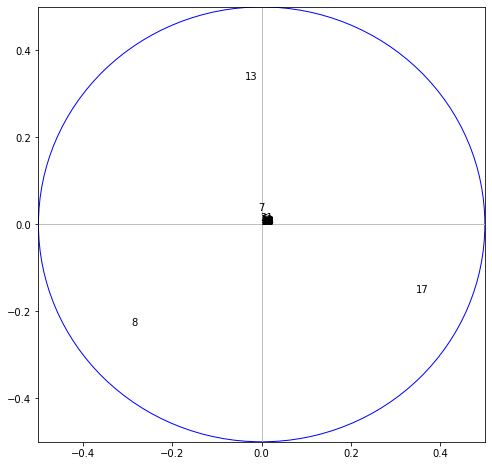

In [27]:
#corrélation des variables avec les axes 1 et 2
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = np.around(acp.components_[k,:] * sqrt_eigval[k],3)
    

#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-0.5,0.5)
axes.set_ylim(-0.5,0.5)
#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(pd.DataFrame(types).columns[j],(corvar[j,0],corvar[j,1]))


#ajouter les axes
plt.plot([-0.5,0.5],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-0.5,0.5],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),0.5,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

On observe que certaines modalités contribuent plus aux deux premiers axes que d'autres.

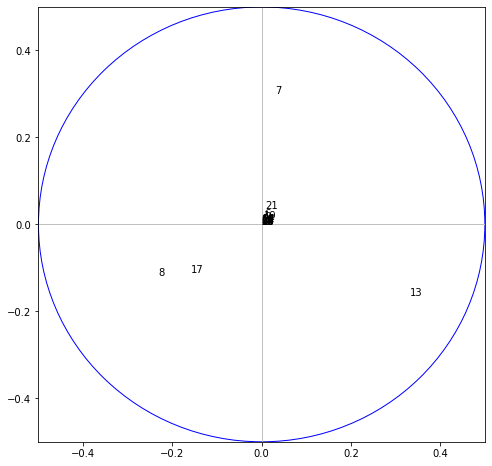

In [29]:
#cercle des corrélations pour les axes 2 et 3
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-0.5,0.5)
axes.set_ylim(-0.5,0.5)
for j in range(p):
    plt.annotate(pd.DataFrame(types).columns[j],(corvar[j,1],corvar[j,2]))

plt.plot([-0.5,0.5],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-0.5,0.5],color='silver',linestyle='-',linewidth=1)

cercle = plt.Circle((0,0),0.5,color='blue',fill=False)
axes.add_artist(cercle)
plt.show()

Idem pour les axes 2 et 3.

In [31]:
#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':pd.DataFrame(types).columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],
                   'CTR_3':ctrvar[:,2],'CTR_4':ctrvar[:,3],
                   'CTR_5':ctrvar[:,4],'CTR_6':ctrvar[:,5],
                   'CTR_7':ctrvar[:,6],'CTR_8':ctrvar[:,7]}))

    id     CTR_1     CTR_2     CTR_3     CTR_4     CTR_5     CTR_6     CTR_7  \
0    0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1    1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2    2  0.000000  0.000000  0.000007  0.000011  0.000017  0.000000  0.000127   
3    3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4    4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000032   
5    5  0.000000  0.000000  0.000000  0.000011  0.000017  0.000000  0.000032   
6    6  0.000005  0.000131  0.001980  0.029030  0.364959  0.402946  0.096233   
7    7  0.000310  0.005037  0.620846  0.206436  0.049926  0.002636  0.019883   
8    8  0.413137  0.282106  0.097039  0.067904  0.030202  0.001765  0.016829   
9    9  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  10  0.000000  0.000005  0.000110  0.000714  0.001387  0.000196  0.007158   
11  11  0.000000  0.000005  0.000062  0.

Pour chaqu'un des 8 axes, on observe que ce sont des modalités différentes (donc des `types` différents) qui contribuent.

**Notre regroupement en 8 classes (effectué "à la main") est donc confirmé par la méthode statistique.**